## Machine Learning Assignment 1
### Murtaza Hussain (29449) and Muhammad Asad ur Rehman (29456)
UCI-ML Dataset Link: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from lazypredict.Supervised import LazyClassifier

In [2]:
# Data Loader loads data from UCI-ML Repo
def load_dataset():
    # fetch dataset
    mushroom = fetch_ucirepo(id=602) 

    # data (as pandas dataframes) 
    x = mushroom.data.features 
    y = mushroom.data.targets 
    z = mushroom.data.original

    # metadata 
    print(mushroom.metadata) 

    # variable information 
    print(mushroom.variables)

    return x, y, z

# UCI-ML Repo Provides us with 3 Pandas DF inherently:
# 1. features (contains only the features)
# 2. targets (the targets to be preddicted)
# 3. original (contains both features and targets)
features, targets, original = load_dataset()

{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

In [3]:
# This function performs a missing value analysis on each column of the dataset, helps you decide on what to do in cleaning process
def null_check(df):
    null_columns = []
    for column in df.columns:
        print("Column Name:", column)
        print("Column DataType:", df[column].dtype)
        if df[column].dtype != 'float64':
            print("Column unique values:", df[column].unique())
        print("Column has null:", df[column].isnull().any())
        if df[column].isnull().any() == True:
            print("Column Null Count:", df[column].isnull().sum())
            null_columns.append(column)
        print("\n")
    return null_columns

null_cols = null_check(original)

Column Name: Area
Column DataType: int64
Column unique values: [28395 28734 29380 ... 42139 42147 42159]
Column has null: False


Column Name: Perimeter
Column DataType: float64
Column has null: False


Column Name: MajorAxisLength
Column DataType: float64
Column has null: False


Column Name: MinorAxisLength
Column DataType: float64
Column has null: False


Column Name: AspectRatio
Column DataType: float64
Column has null: False


Column Name: Eccentricity
Column DataType: float64
Column has null: False


Column Name: ConvexArea
Column DataType: int64
Column unique values: [28715 29172 29690 ... 42494 42667 42600]
Column has null: False


Column Name: EquivDiameter
Column DataType: float64
Column has null: False


Column Name: Extent
Column DataType: float64
Column has null: False


Column Name: Solidity
Column DataType: float64
Column has null: False


Column Name: Roundness
Column DataType: float64
Column has null: False


Column Name: Compactness
Column DataType: float64
Column has

In [4]:
# This function drops any null columns and missing values
# This is where you decide whether to remove NULL rows (which will reduce the size of Dataset) or remove NULL columns entirely. You can also choose a combination of both.
def clean_data(df, drop_columns, missing_value):
    # Remove unnecessary columns
    df.drop(drop_columns, axis=1, inplace=True)
    # Drop rows with any missing values
    if missing_value == False:
        df.dropna(inplace=True)
    else:
        df.fillna(missing_value, inplace=True)
    return df

clean_data(original,null_cols,False)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.29,208.18,173.89,1.20,0.55,28715,190.14,0.76,0.99,0.96,0.91,0.01,0.00,0.83,1.00,SEKER
1,28734,638.02,200.52,182.73,1.10,0.41,29172,191.27,0.78,0.98,0.89,0.95,0.01,0.00,0.91,1.00,SEKER
2,29380,624.11,212.83,175.93,1.21,0.56,29690,193.41,0.78,0.99,0.95,0.91,0.01,0.00,0.83,1.00,SEKER
3,30008,645.88,210.56,182.52,1.15,0.50,30724,195.47,0.78,0.98,0.90,0.93,0.01,0.00,0.86,0.99,SEKER
4,30140,620.13,201.85,190.28,1.06,0.33,30417,195.90,0.77,0.99,0.98,0.97,0.01,0.00,0.94,1.00,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.70,288.72,185.94,1.55,0.77,42508,231.52,0.71,0.99,0.92,0.80,0.01,0.00,0.64,1.00,DERMASON
13607,42101,757.50,281.58,190.71,1.48,0.74,42494,231.53,0.80,0.99,0.92,0.82,0.01,0.00,0.68,1.00,DERMASON
13608,42139,759.32,281.54,191.19,1.47,0.73,42569,231.63,0.73,0.99,0.92,0.82,0.01,0.00,0.68,1.00,DERMASON
13609,42147,763.78,283.38,190.28,1.49,0.74,42667,231.65,0.71,0.99,0.91,0.82,0.01,0.00,0.67,1.00,DERMASON


In [5]:
# Transforms categorical and numberical data into numerical data
def transform_data(df):
    # Encode categorical variables
    label_encoder = LabelEncoder()
    print("Categorical columns:", df.select_dtypes(include=['object']).columns)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])
    
    # Standardize numerical features
    scaler = StandardScaler()
    print("Numerical columns:", df.select_dtypes(include=['float64', 'int64']).columns)
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) > 0:
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

transform_data(original)

Categorical columns: Index(['Class'], dtype='object')
Numerical columns: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.84,-1.14,-1.31,-0.63,-1.57,-2.19,-0.84,-1.06,0.29,0.37,1.42,1.84,0.68,2.40,1.93,0.84,5
1,-0.83,-1.01,-1.40,-0.43,-1.97,-3.69,-0.83,-1.04,0.70,-0.46,0.23,2.50,0.37,3.10,2.69,0.77,5
2,-0.81,-1.08,-1.25,-0.59,-1.51,-2.05,-0.81,-1.01,0.58,0.52,1.25,1.76,0.60,2.24,1.84,0.92,5
3,-0.79,-0.98,-1.28,-0.44,-1.74,-2.74,-0.77,-0.97,0.67,-2.24,0.52,2.08,0.40,2.52,2.20,-0.20,5
4,-0.78,-1.10,-1.38,-0.27,-2.12,-4.54,-0.78,-0.97,0.48,0.80,1.87,2.77,0.12,3.27,3.01,0.94,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.37,-0.45,-0.37,-0.36,-0.12,0.15,-0.38,-0.36,-0.72,0.68,0.73,0.03,0.26,0.06,-0.01,0.76,3
13607,-0.37,-0.46,-0.45,-0.26,-0.43,-0.17,-0.38,-0.36,1.02,0.77,0.82,0.36,0.11,0.29,0.33,0.72,3
13608,-0.37,-0.45,-0.45,-0.25,-0.45,-0.18,-0.38,-0.36,-0.40,0.59,0.76,0.37,0.10,0.29,0.34,0.39,3
13609,-0.37,-0.43,-0.43,-0.27,-0.38,-0.11,-0.37,-0.36,-0.90,0.14,0.58,0.29,0.14,0.23,0.25,0.04,3


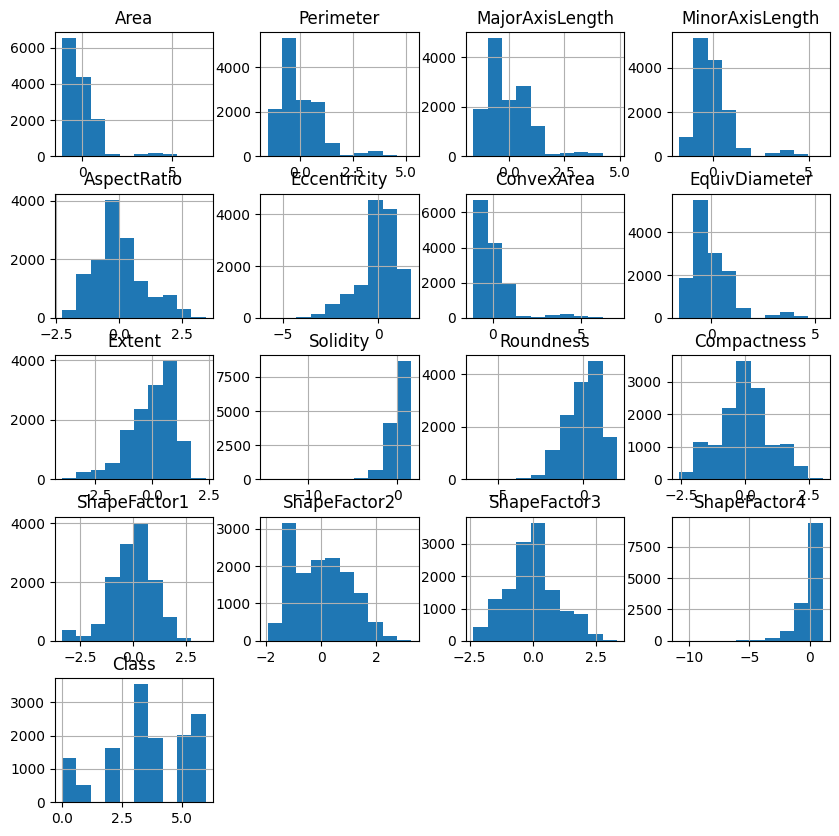

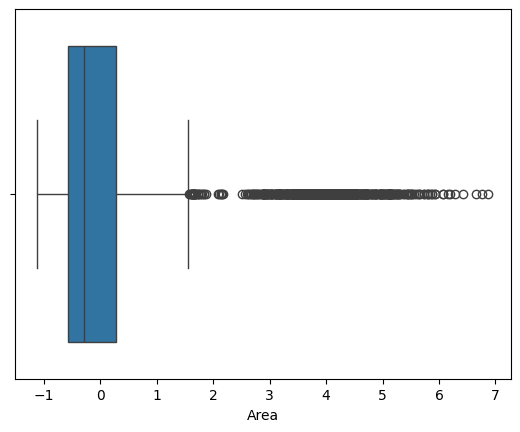

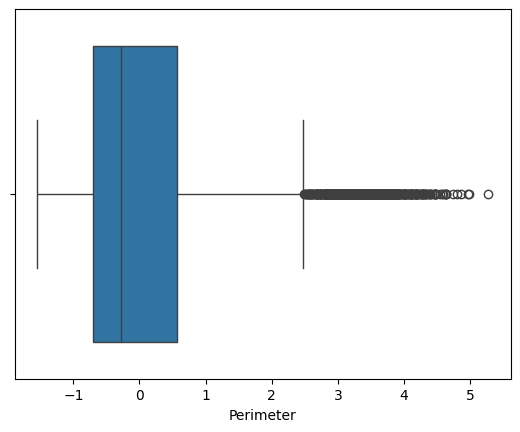

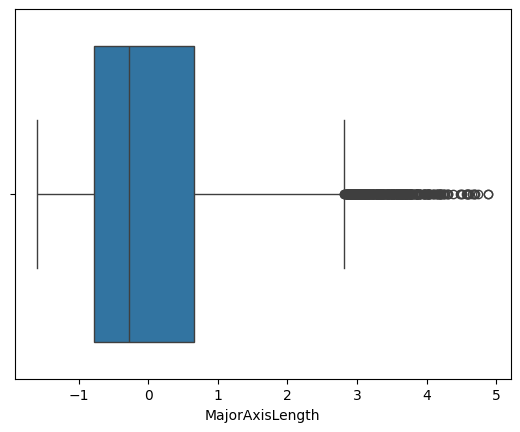

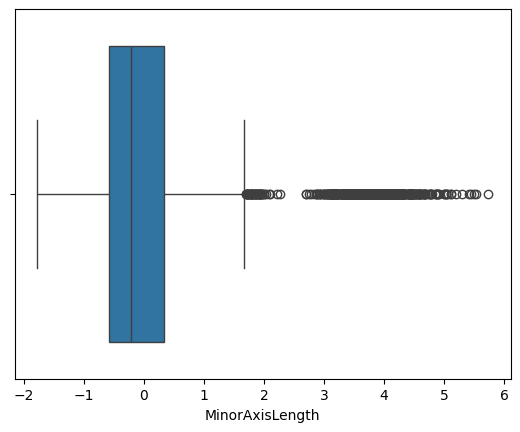

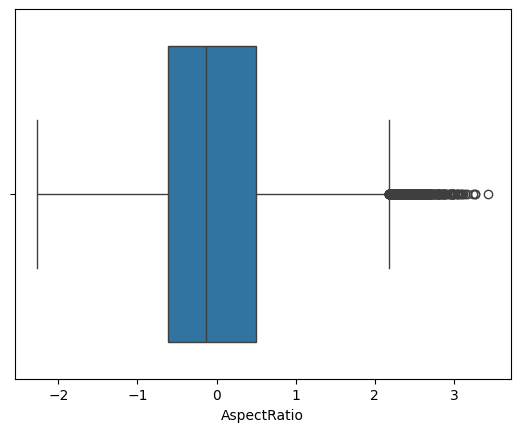

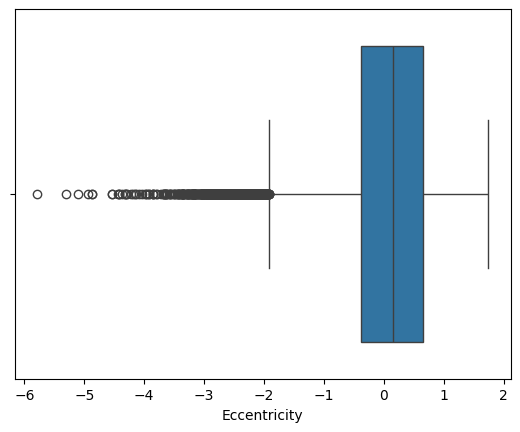

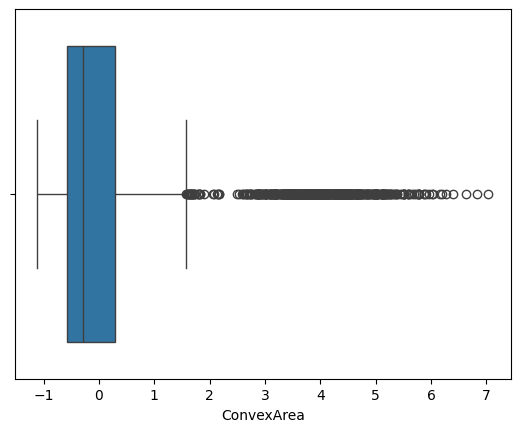

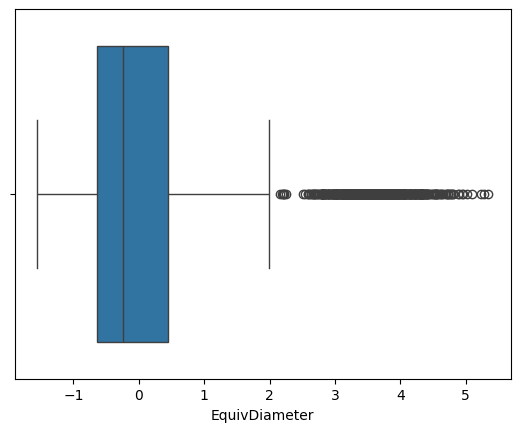

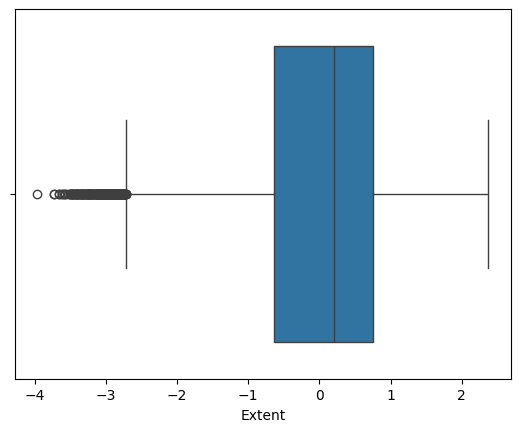

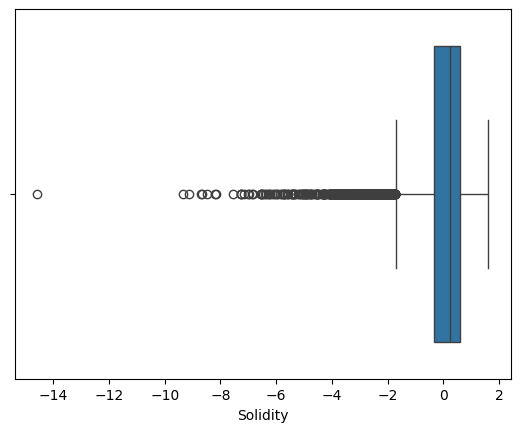

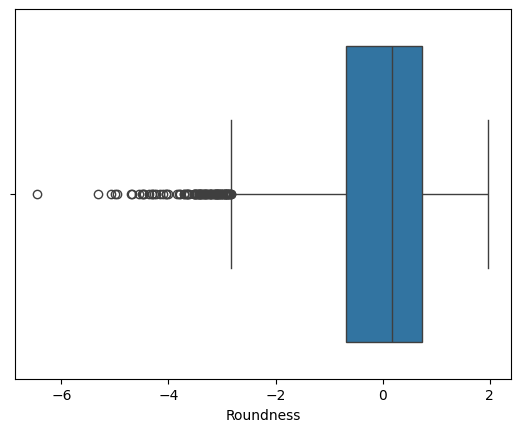

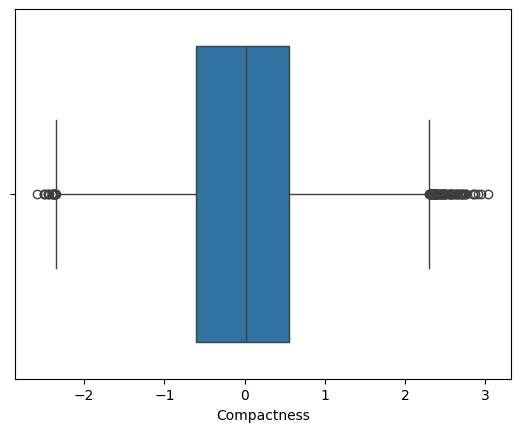

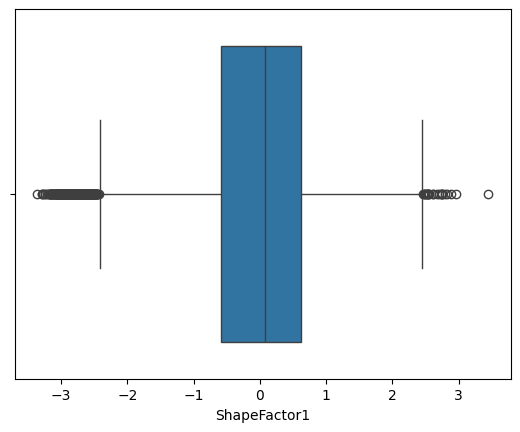

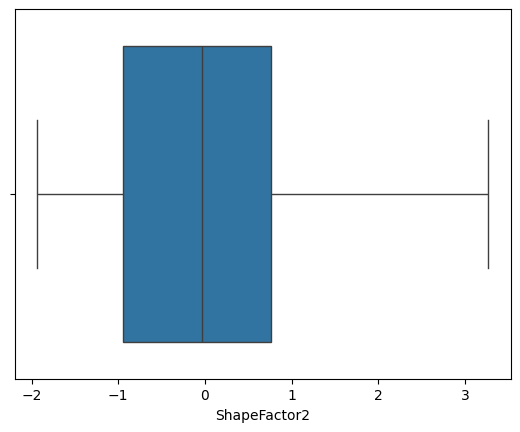

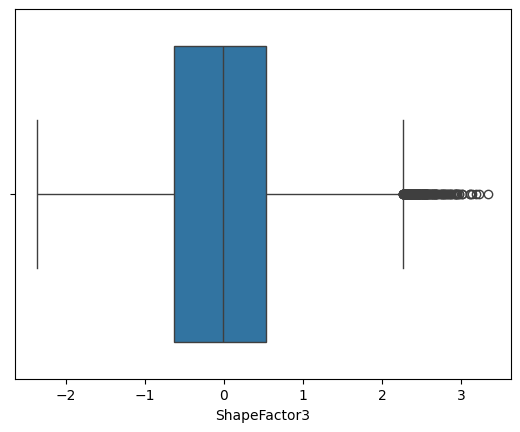

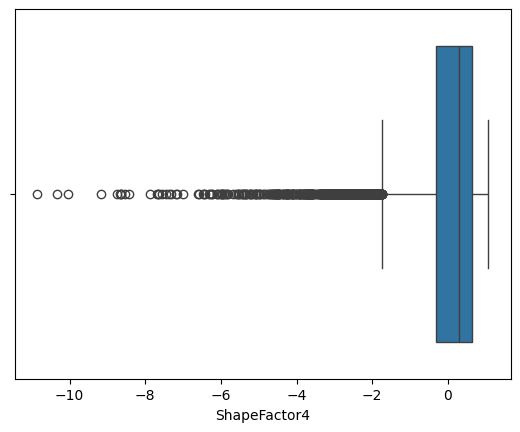

In [6]:
# Creates histograms for categorical data
def plot_histograms(df):
    df.hist(figsize=(10, 10))
    plt.show()

# Creates boxplot for numerical data
def plot_boxplots(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        sns.boxplot(x=df[col])
        plt.show()

plot_histograms(original)
plot_boxplots(original)

In [7]:
def outlier_removal(df, excluded_columns = []):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column not in excluded_columns:
            # Calculate Q1, Q3, and IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define the range for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [8]:
def generate_summary_statistics(original):
    """
    Generate summary statistics for a given DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: Summary statistics DataFrame.
    """
    # Compute mean
    mean = original.mean()

    # Compute mode
    mode = original.mode().iloc[0]  # Mode may have multiple values, so we take the first one

    # Compute median
    median = original.median()

    # Compute quartiles
    quartiles = original.quantile([0.25, 0.5, 0.75])

    # Compute minimum and maximum
    minimum = original.min()
    maximum = original.max()

    # Combine the results into a DataFrame for easier visualization
    summary_df = pd.DataFrame({
        'Mean': mean,
        'Mode': mode,
        'Median': median,
        'Q1': quartiles.loc[0.25],
        'Q2': quartiles.loc[0.5],
        'Q3': quartiles.loc[0.75],
        'Minimum': minimum,
        'Maximum': maximum
    })

    return summary_df

In [9]:
# Runs KNNClassifier on default settings
def knn_classifier(df, target_name):
    # Separate features and targets and perform data splitting
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    knn_model = KNeighborsClassifier()
    
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    print(classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))

In [10]:
# Runs KNN CV on default settings
def knn_cv(df, target_name, cv=5):

    # Separate features and targets
    X = df.drop(target_name, axis=1)
    y = df[target_name]

    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier()
    
    # Initialize k-fold cross-validation
    k_fold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Perform cross-validation and compute scores
    scores = cross_val_score(knn_classifier, X, y, cv=k_fold, scoring='accuracy')
    
    # Calculate and print the mean and standard deviation of the scores
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", mean_accuracy)
    print("Standard Deviation of Accuracy:", std_accuracy)

In [11]:
def lazy_classifier(df, target_name):
    # Separate features and targets and perform data splitting
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Initialize Lazy Classifier
    clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)

    # Generate predictions and evaluate performance
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    print("Mean Accuracy of the Dataset: ", models['Accuracy'].mean())
    print("Standard Deviation of Accuracy of the Dataset: ", models['Accuracy'].std())
    
    return models

model = lazy_classifier(original, targets.columns[0])

  3%|▎         | 1/29 [00:01<00:54,  1.95s/it]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')


  7%|▋         | 2/29 [00:03<00:52,  1.93s/it]

ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 14%|█▍        | 4/29 [00:09<01:00,  2.41s/it]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 21%|██        | 6/29 [00:09<00:31,  1.36s/it]

ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 31%|███       | 9/29 [00:11<00:18,  1.10it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')


 38%|███▊      | 11/29 [00:11<00:12,  1.42it/s]

ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')


 41%|████▏     | 12/29 [00:19<00:33,  1.97s/it]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 45%|████▍     | 13/29 [00:31<01:06,  4.16s/it]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 52%|█████▏    | 15/29 [00:32<00:39,  2.85s/it]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')


 55%|█████▌    | 16/29 [00:33<00:30,  2.33s/it]

ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
NuSVC model failed to execute
specified nu is infeasible
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')


 72%|███████▏  | 21/29 [00:33<00:07,  1.12it/s]

ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 76%|███████▌  | 22/29 [00:38<00:11,  1.67s/it]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')


 86%|████████▌ | 25/29 [00:38<00:03,  1.03it/s]

ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')


 90%|████████▉ | 26/29 [00:40<00:03,  1.13s/it]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:42<00:01,  1.12s/it]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 10888, number of used features: 16
[LightGBM] [Info] Start training from score -2.332227
[LightGBM] [Info] Start training from score -3.259935
[LightGBM] [Info] Start training from score -2.122225
[LightGBM] [Info] Start training from score -1.344914
[LightGBM] [Info] Start training from score -1.954581
[LightGBM] [Info] Start training from score -1.904618
[LightGBM] [Info] Start training from score -1.641447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

100%|██████████| 29/29 [00:45<00:00,  1.56s/it]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
Mean Accuracy of the Dataset:  0.8646430690132489
Standard Deviation of Accuracy of the Dataset:  0.13975666503306955


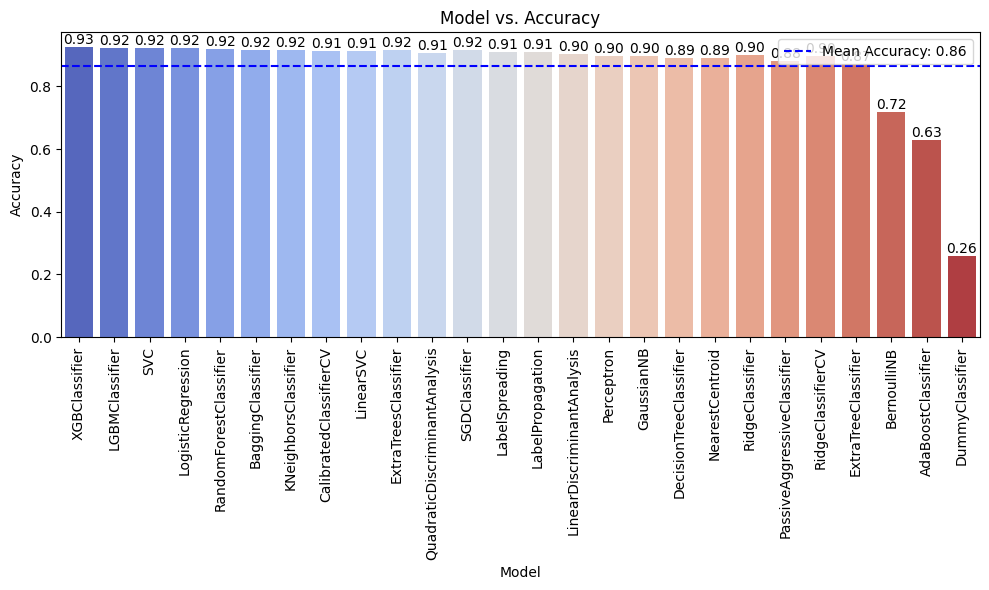

In [12]:
# Plot a model vs Accuracy graph for Lazy Predict
def plot_model_accuracy_graph(df):
    mean_accuracy = df['Accuracy'].mean()
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Model', y='Accuracy', data=df, palette='coolwarm')
    plt.axhline(mean_accuracy, color='blue', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
    plt.title('Model vs. Accuracy')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    plt.legend()

    for i in range(len(df)):
        plt.text(i, df['Accuracy'][i], f"{df['Accuracy'][i]:.2f}", ha = 'center', va = 'bottom')

    plt.tight_layout()
    plt.show()

plot_model_accuracy_graph(model)

In [13]:
# Master Workflow, combines and manages all the workflow from one place
# Specifically Tailored for Mushroom Dataset
def master_workflow():
    features, targets, original = load_dataset()
    null_cols = null_check(original)
    original = clean_data(original,null_cols,False)
    original = transform_data(original)
    print("Original Summary Statistics: \n", generate_summary_statistics(original))
    plot_histograms(original)
    print("Original Boxplots: \n")
    plot_boxplots(original)
    print("KNN Classifier:")
    knn_classifier(original, targets.columns[0])
    print("Cross-Validation with KNN Classifier:")
    knn_cv(original, targets.columns[0])
    print("Lazy Predict for different models:")
    model = lazy_classifier(original, targets.columns[0])
    plot_model_accuracy_graph(model)

{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

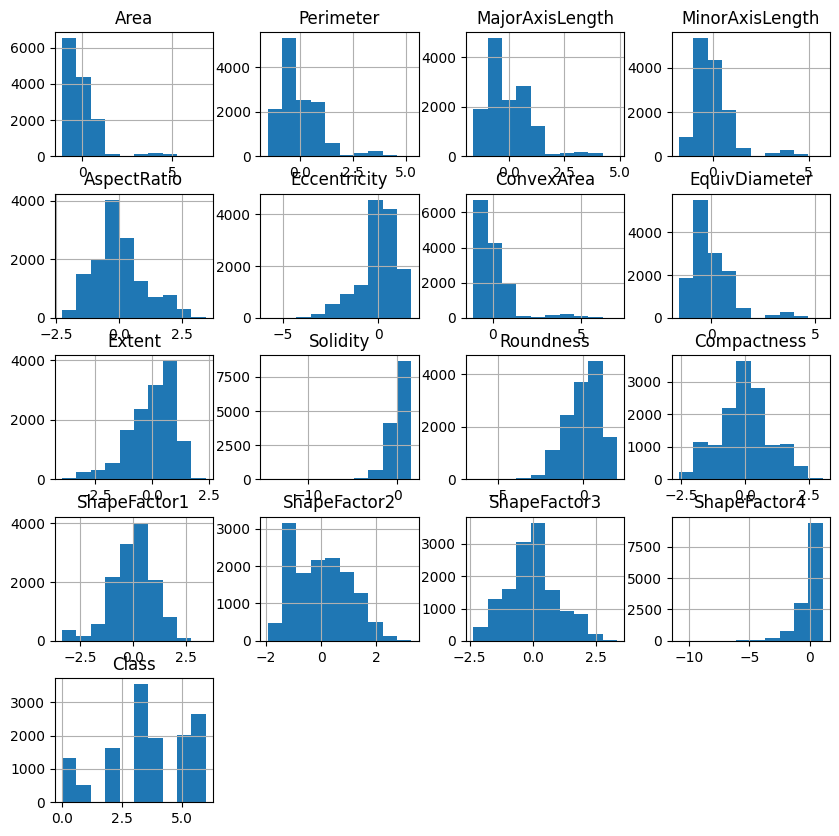

Original Boxplots: 



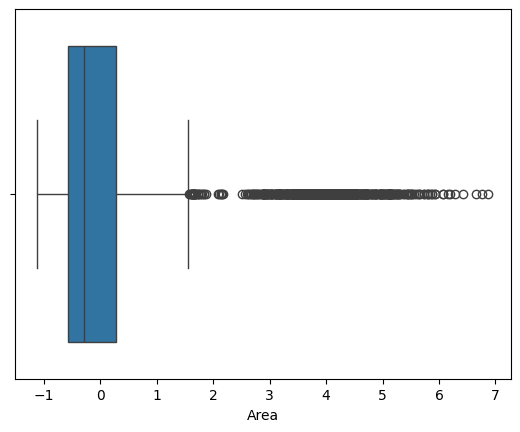

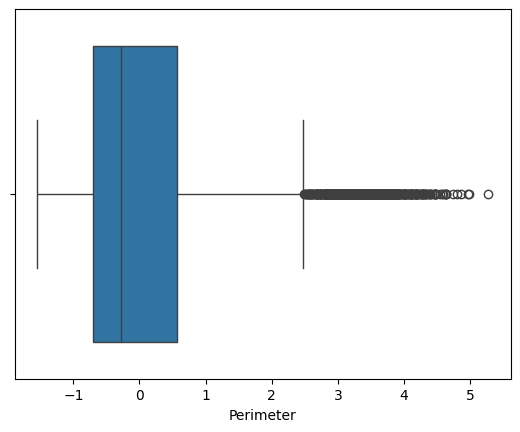

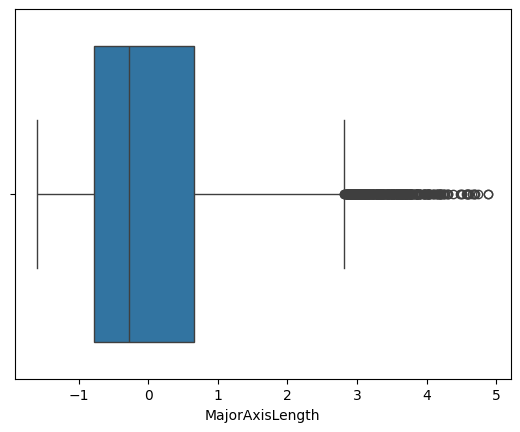

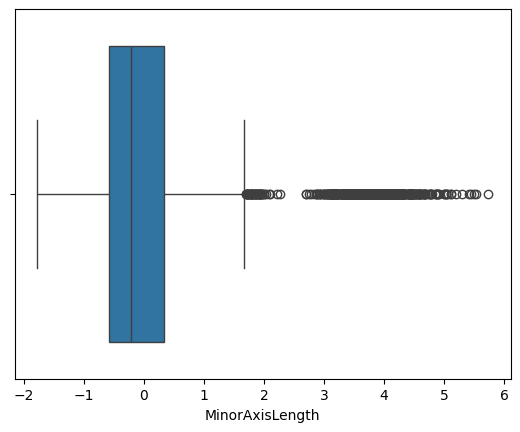

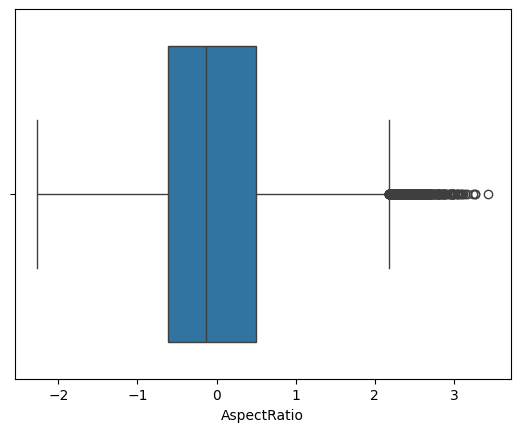

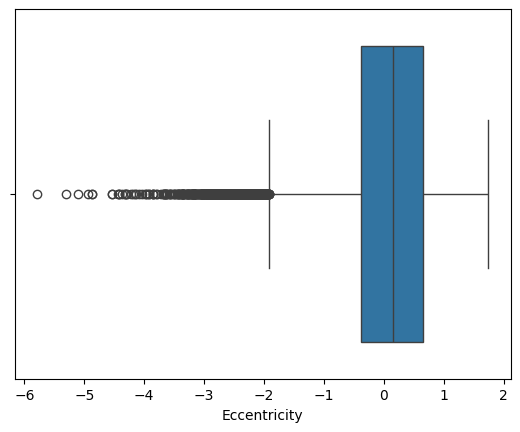

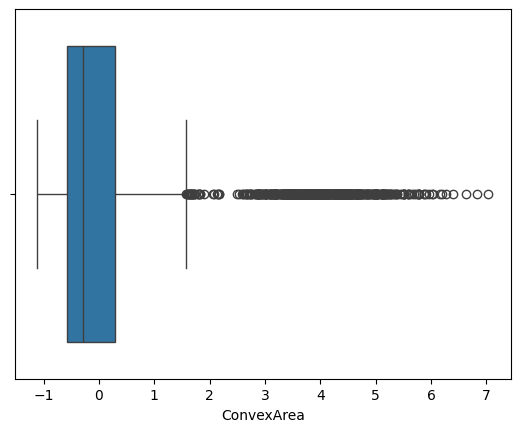

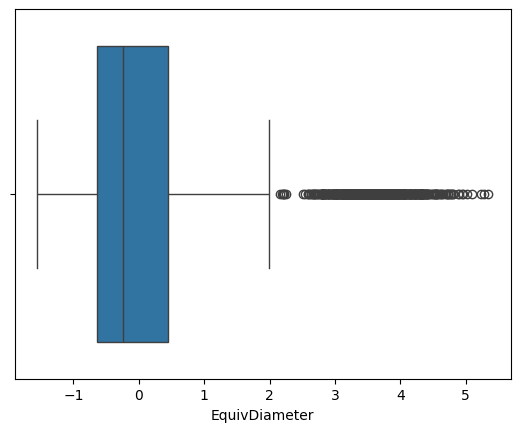

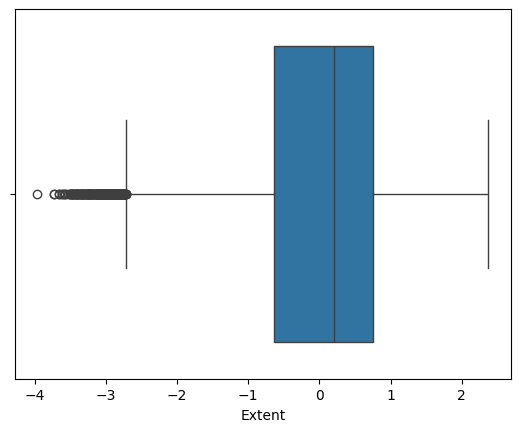

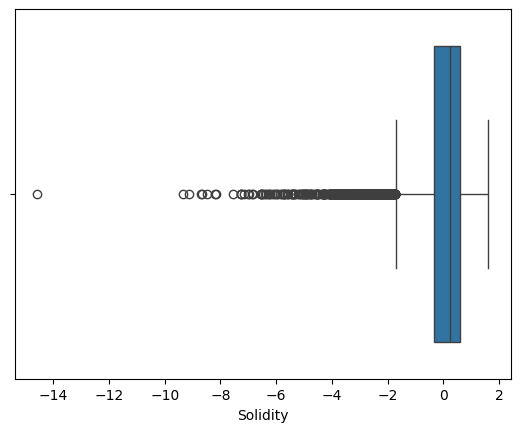

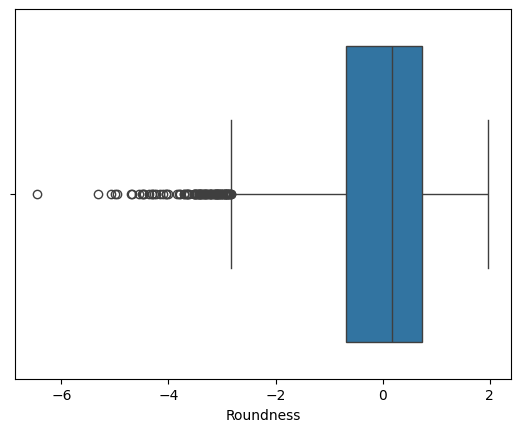

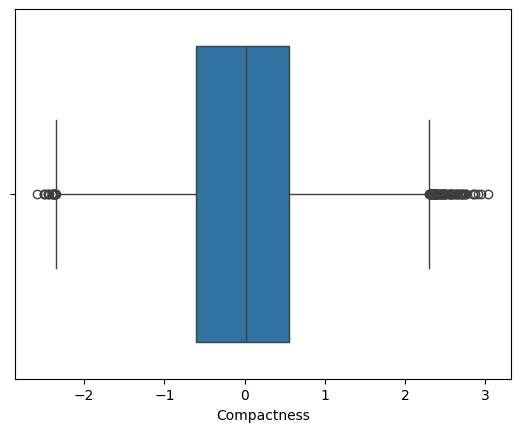

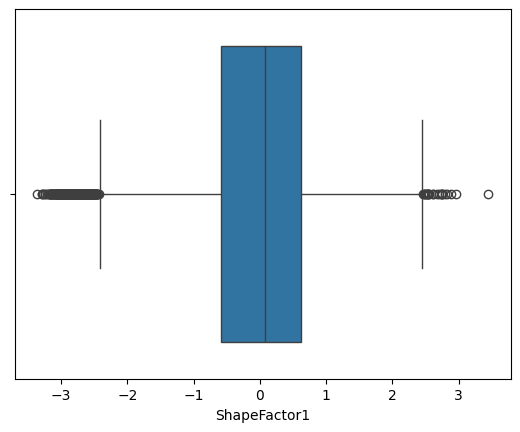

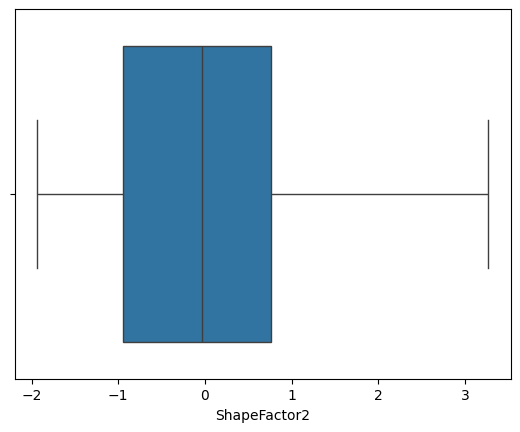

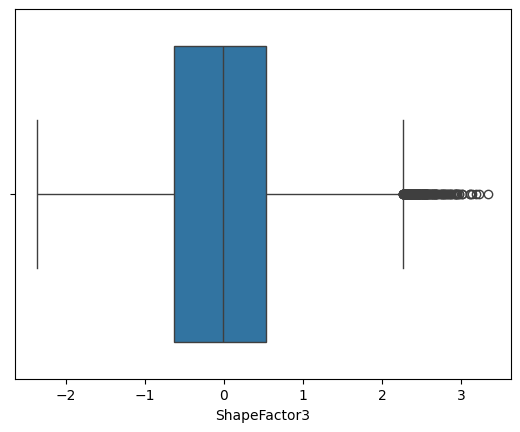

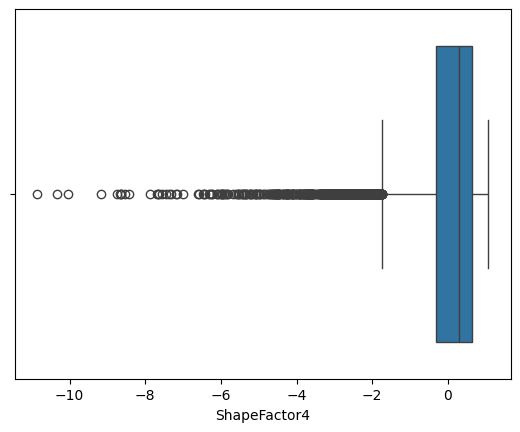

KNN Classifier:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       265
           1       1.00      1.00      1.00       104
           2       0.92      0.94      0.93       326
           3       0.91      0.91      0.91       709
           4       0.95      0.95      0.95       386
           5       0.95      0.94      0.95       406
           6       0.85      0.87      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

Accuracy: 0.9170033051781123
Cross-Validation with KNN Classifier:
Cross-Validation Scores: [0.91773779 0.92909625 0.92578986 0.92689199 0.92101396]
Mean Accuracy: 0.924105970772285
Standard Deviation of Accuracy: 0.004137984373613764
Lazy Predict for different models:


  3%|▎         | 1/29 [00:02<00:58,  2.08s/it]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')


  7%|▋         | 2/29 [00:03<00:53,  1.96s/it]

ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 14%|█▍        | 4/29 [00:09<01:03,  2.52s/it]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 21%|██        | 6/29 [00:10<00:32,  1.43s/it]

ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 31%|███       | 9/29 [00:11<00:18,  1.09it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')


 38%|███▊      | 11/29 [00:11<00:12,  1.47it/s]

ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')


 41%|████▏     | 12/29 [00:18<00:31,  1.87s/it]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 45%|████▍     | 13/29 [00:30<01:02,  3.90s/it]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 52%|█████▏    | 15/29 [00:31<00:38,  2.72s/it]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')


 66%|██████▌   | 19/29 [00:32<00:11,  1.19s/it]

ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
NuSVC model failed to execute
specified nu is infeasible
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')


 69%|██████▉   | 20/29 [00:32<00:08,  1.01it/s]

ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 83%|████████▎ | 24/29 [00:37<00:05,  1.05s/it]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')


 86%|████████▌ | 25/29 [00:37<00:03,  1.14it/s]

ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')


 90%|████████▉ | 26/29 [00:39<00:03,  1.08s/it]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:41<00:01,  1.08s/it]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 10888, number of used features: 16
[LightGBM] [Info] Start training from score -2.332227
[LightGBM] [Info] Start training from score -3.259935
[LightGBM] [Info] Start training from score -2.122225
[LightGBM] [Info] Start training from score -1.344914
[LightGBM] [Info] Start training from score -1.954581
[LightGBM] [Info] Start training from score -1.904618
[LightGBM] [Info] Start training from score -1.641447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

100%|██████████| 29/29 [00:43<00:00,  1.51s/it]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
Mean Accuracy of the Dataset:  0.8646430690132489
Standard Deviation of Accuracy of the Dataset:  0.13975666503306955


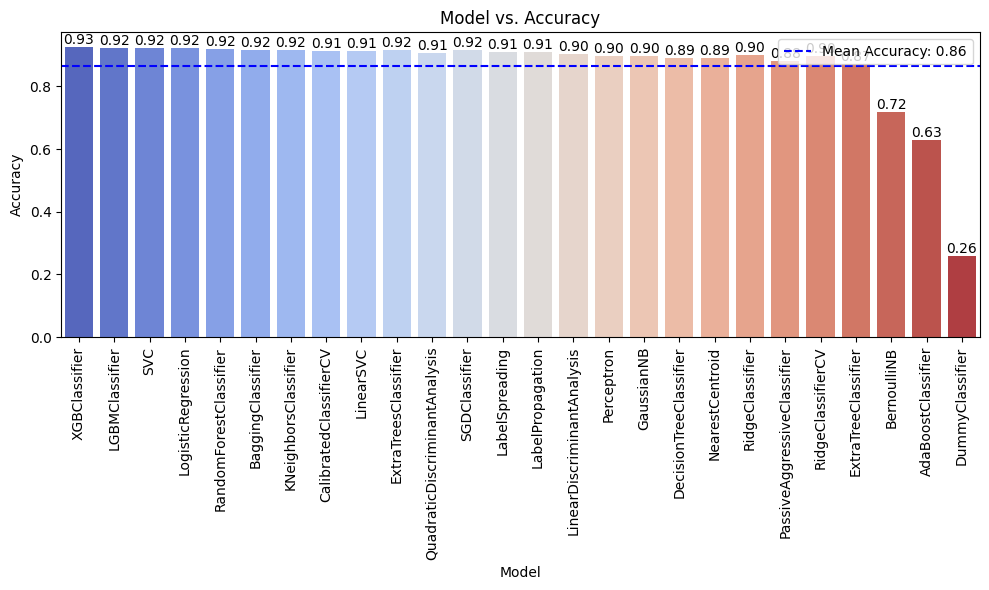

In [14]:
master_workflow()

### EDA Interpretation

Interpretation of EDA:
- Analysis of feature distributions and relationships showed that the numerical values in the dataset were widely distributed.
- There were many extreme outliers in regards to distribution of the feature values, however we tried removing them and the accuracy of the models decreased overall.
- The dataset does not contain any Null values in any of the features or target.


### ML Results Interpretation

Interpretation of ML Results:
- KNN was applied to the dataset, the accuracy of the model was 0.917.
- KNN with cross-validation was also applied to the dataset, the mean accuracy was 0.924 with a standard deviation of 0.004
- Additionally we also applied Lazy Predict on the dataset, the mean accuracy of the models was 0.865 with a standard deviation of 0.150
- It was observed that the model performed better with Cross Validation in comparision.
- The model performance suggests that the model has a data with related features, however, feature selection would still be required to improve results. 
- Additionally a rather class based data cleansing might improve the results even further.